## About Dataset


### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Column Information

#### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise



### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target

Need to perform clustering to summarize customer segments.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("marketing_campaign.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
df.shape

(2240, 29)

In [7]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since there are some missing values in Income we will check that column and replace missing values with mean or median

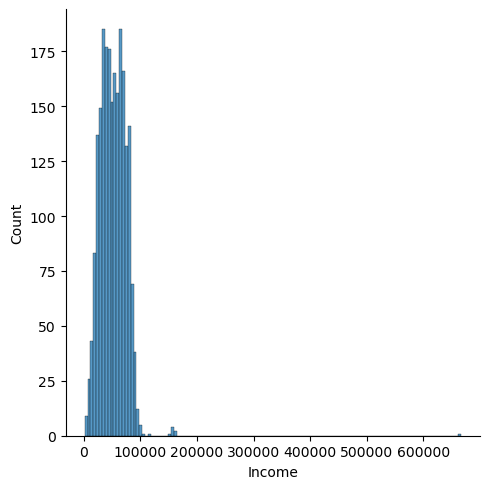

In [9]:
sns.displot(df['Income'])
plt.show()

since the data is right skewed we will replace the missing values with median

In [10]:
df.Income=df.Income.fillna(df.Income.median())

In [11]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


checking for duplicate rows

In [12]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [13]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'],axis=1)

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Univariate Analysis :-

1.Analysis on Year_Birth Variable.

In [15]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
df.Year_Birth.value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

<Axes: xlabel='Year_Birth', ylabel='Count'>

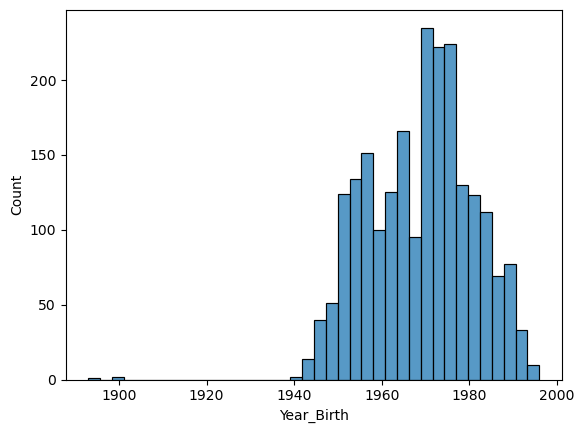

In [16]:
sns.histplot(df.Year_Birth)

Data points in year birth are uniformly distributed

2.Analysis On Education Variable.

In [17]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [18]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

<Axes: xlabel='Education', ylabel='count'>

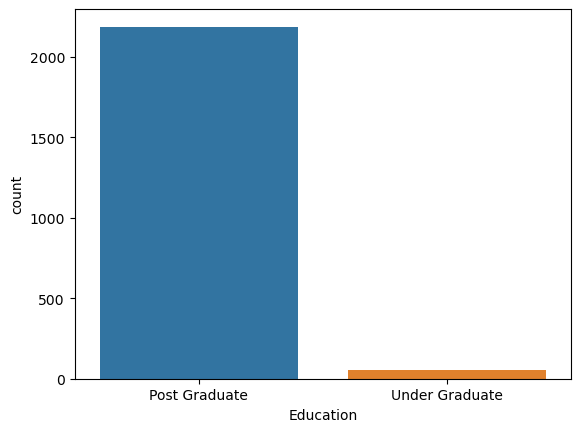

In [19]:
sns.countplot(data=df,x=df['Education'])

We observed that most of the data points here are post-Graduated

3.Analysis On Marital_Status Variable.

In [20]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

<Axes: xlabel='Marital_Status', ylabel='count'>

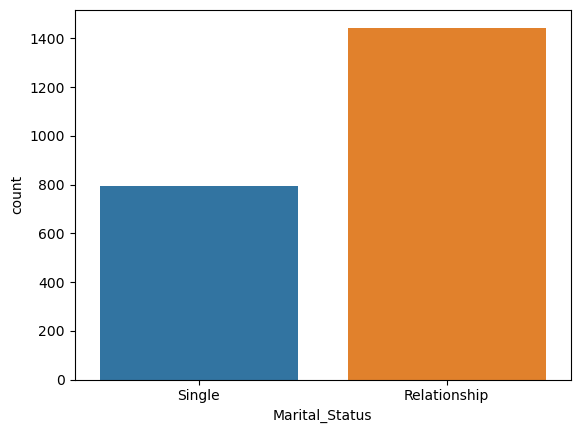

In [22]:
sns.countplot(data=df, x=df.Marital_Status)

mostly customers are in relationship/married

4.Analysis On Income Variable.

In [23]:
df.Income.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

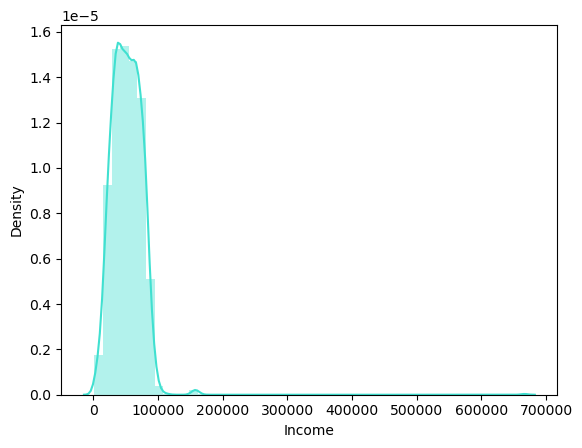

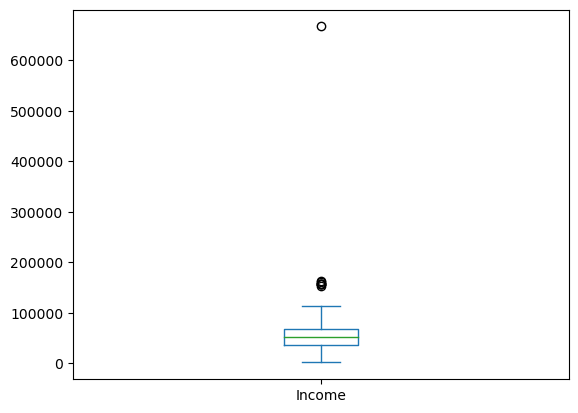

In [24]:
sns.distplot(df["Income"],color = 'turquoise')
plt.show()
df["Income"].plot.box()
plt.show()

The income column is left skewed as we saw earrlier but it has some outliers that we will treat it in later stage while model building

5.Analysis On "Kidhome,Teenhome" Variable.

In [25]:
df['Teenhome'].unique()


array([0, 1, 2], dtype=int64)

In [26]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [27]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']

<Axes: xlabel='Kids', ylabel='count'>

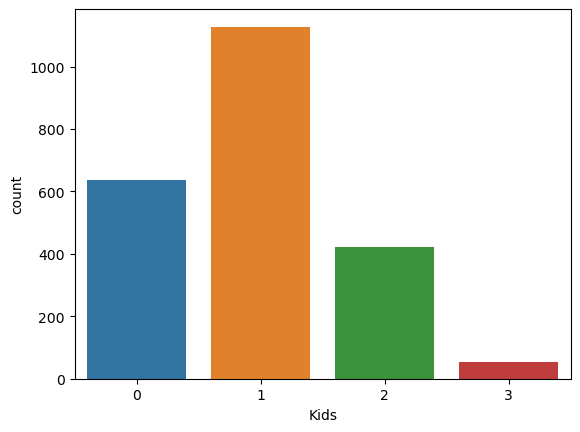

In [28]:
sns.countplot(data=df, x=df.Kids)

6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [29]:
df[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [30]:
df['MntFishProducts'].nunique()

182

In [31]:
df['MntFruits'].nunique()

158

In [32]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [33]:
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

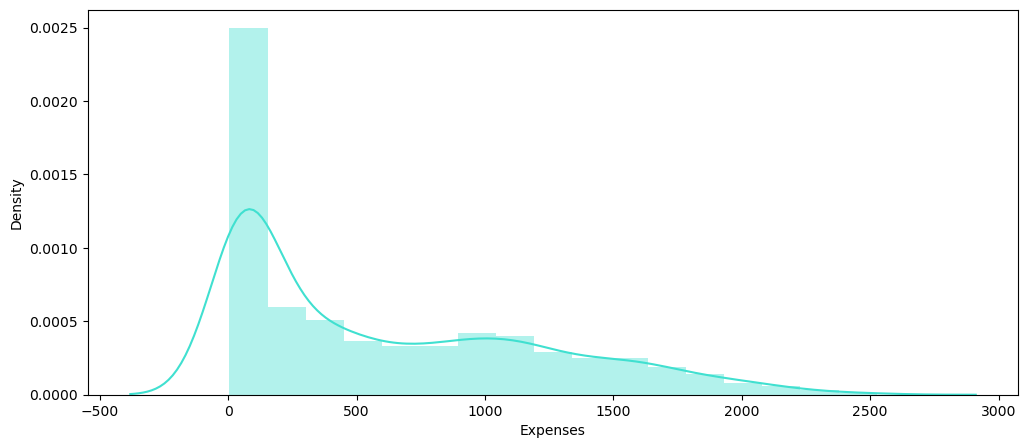

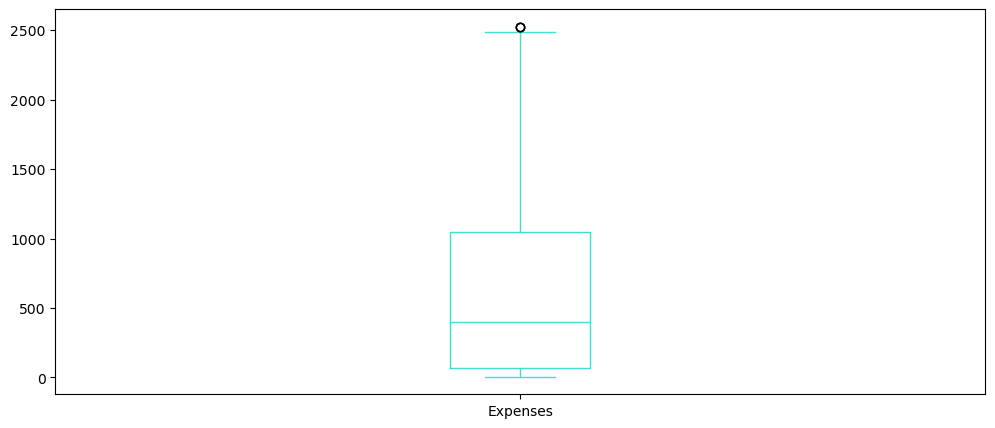

In [34]:
plt.figure(figsize=(12,5))
sns.distplot(df["Expenses"],color = 'turquoise')
plt.show()
df["Expenses"].plot.box(figsize=(12,5),color='turquoise')
plt.show()

7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

In [35]:
df.AcceptedCmp1.unique()

array([0, 1], dtype=int64)

In [36]:
df.AcceptedCmp2.unique()

array([0, 1], dtype=int64)

In [37]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




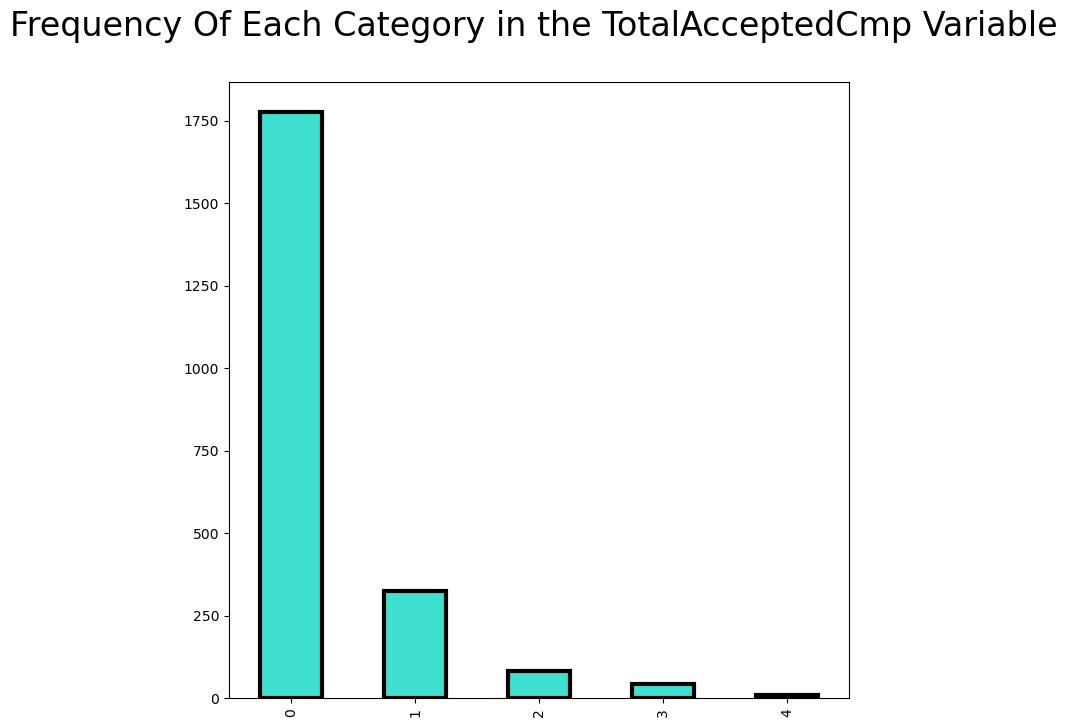

In [38]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [39]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [40]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [41]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [42]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [43]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [44]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

<Axes: xlabel='NumTotalPurchases', ylabel='count'>

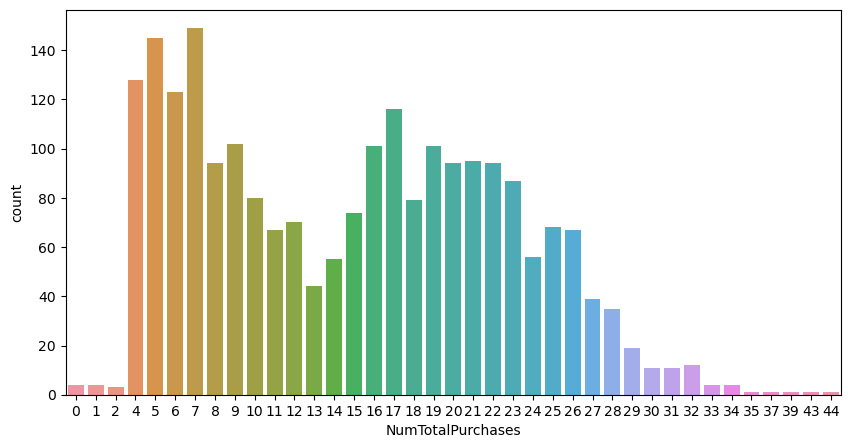

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df.NumTotalPurchases)

9. Converting the Year_Birth to customer_Age

In [46]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,0,19,43


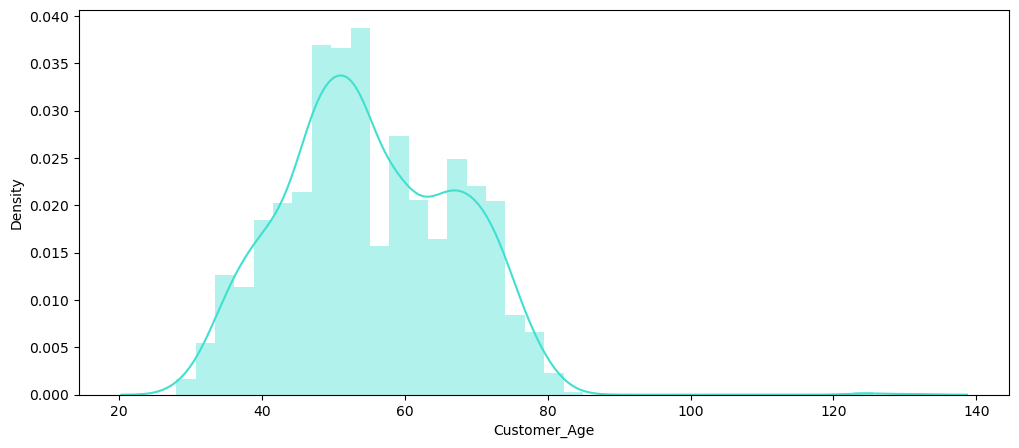

In [47]:
plt.figure(figsize=(12,5))
sns.distplot(df["Customer_Age"],color = 'turquoise')
plt.show()

Most of the cutomers we have are in middle age i.e between 35-55

In [48]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [49]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   Kids               2240 non-null   int64  
 8   Expenses           2240 non-null   int64  
 9   TotalAcceptedCmp   2240 non-null   int64  
 10  NumTotalPurchases  2240 non-null   int64  
 11  Customer_Age       2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


 in the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [51]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [52]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

In [53]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43,161


In [54]:
df['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

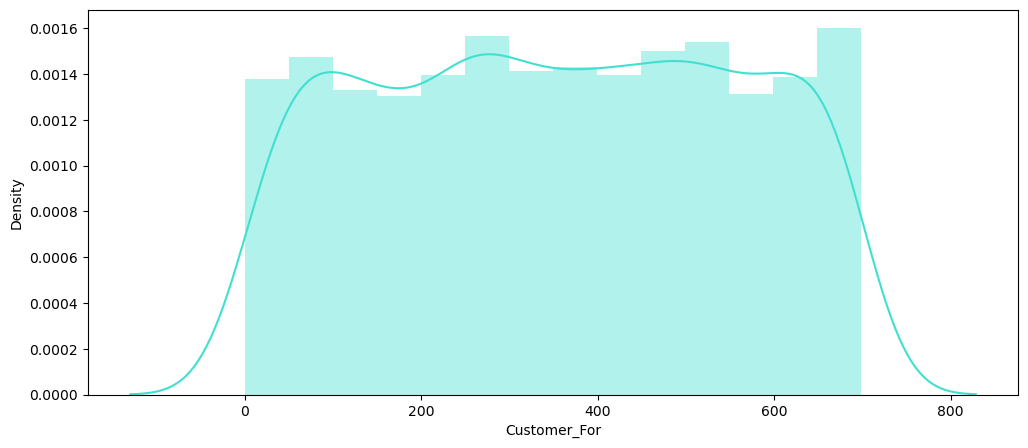

In [55]:
plt.figure(figsize=(12,5))

sns.distplot(df["Customer_For"],color = 'turquoise')
plt.show()

Most of the customers are regular to the campaign for 0-700 days

In [56]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [57]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


## Bivariate Analysis
1.Education vs Expenses

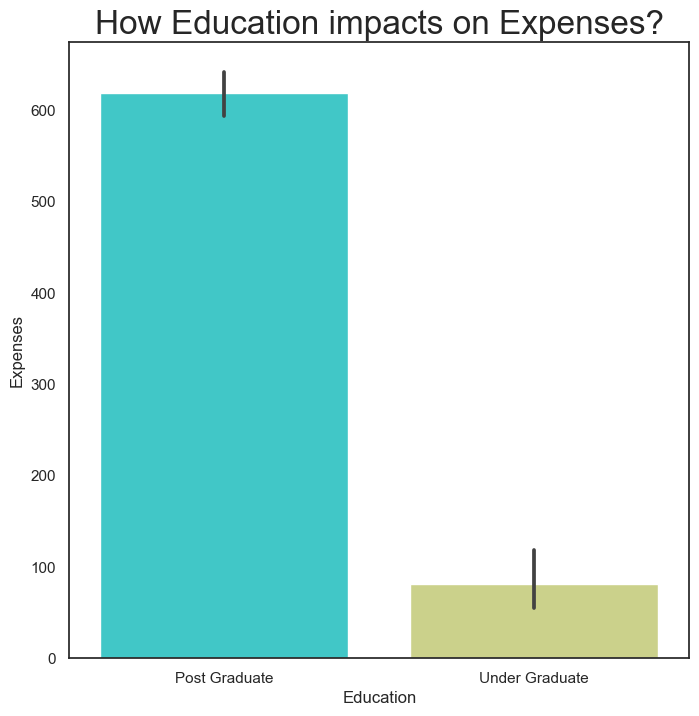

In [58]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

We observe that the post graduated people spends more than the UG people


2.Marital status vs Expenses

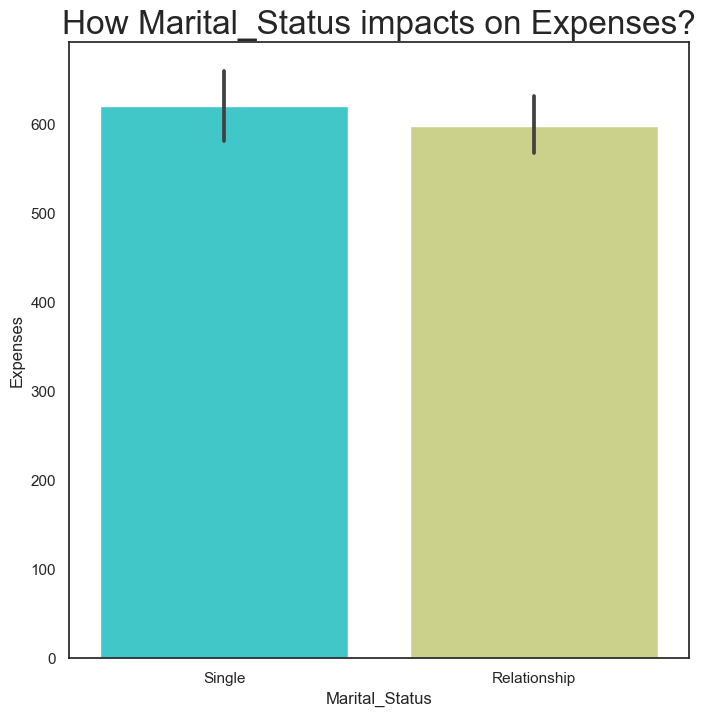

In [59]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

We observe that single and married people have the same spendings

3.Kids vs Expenses

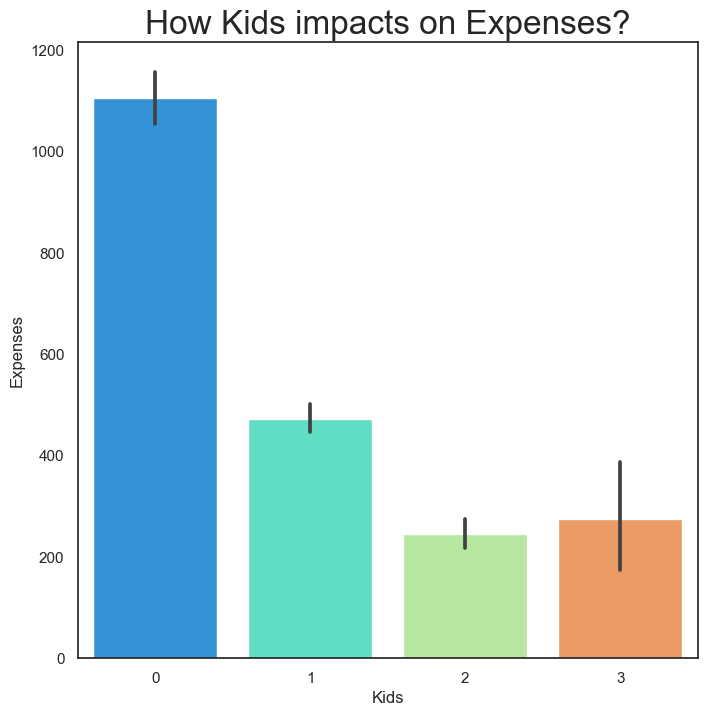

In [60]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

4.TotalAcceptedCmp vs Expenses

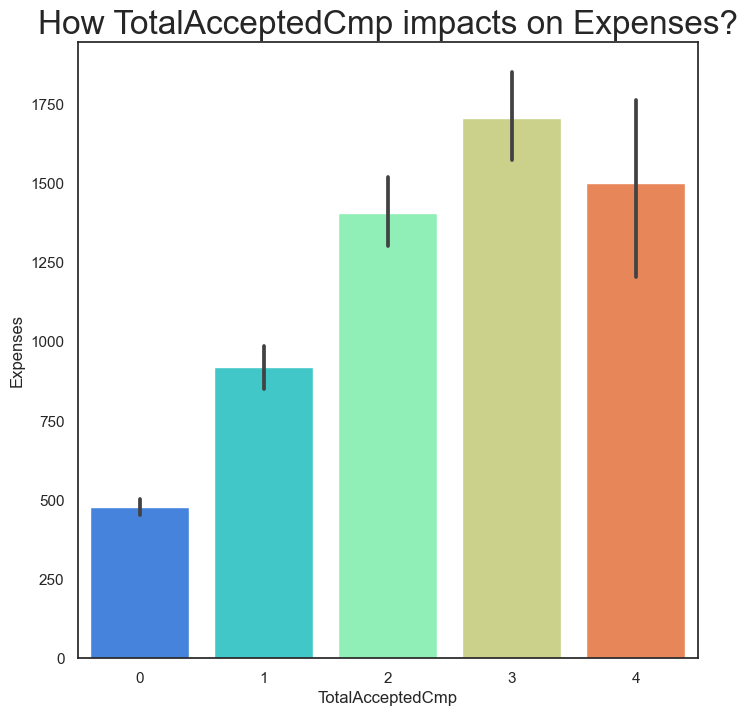

In [61]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")

those who accepeted more campaign have more expenses

5.NumTotalPurchases vs Expenses

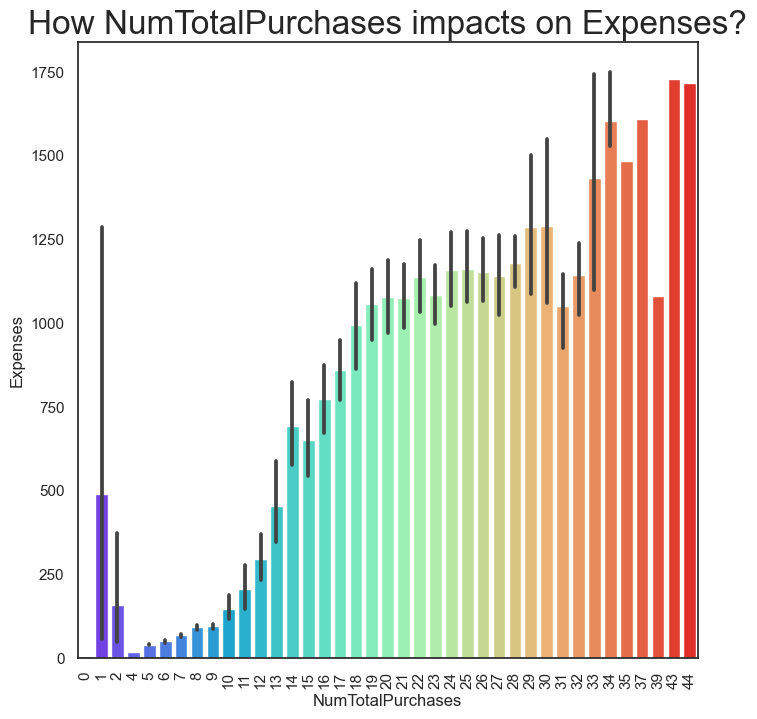

In [62]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow")

Those who have more purchases have more expenses

6.Day engaged vs Expenses

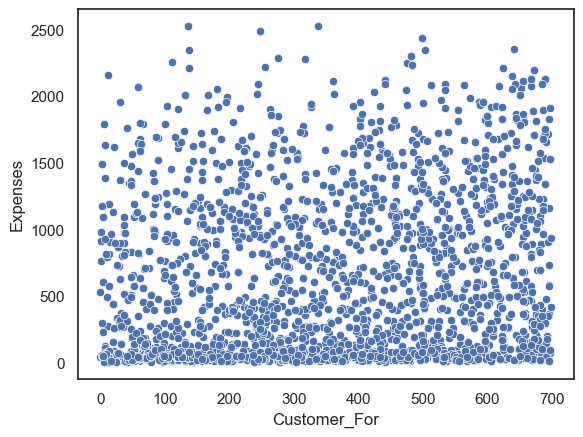

In [63]:
sns.scatterplot(x=df['Customer_For'],y=df['Expenses'])

plt.show()

No relationship between days enagaged vs expenses


7.Customer Age vs Expenses

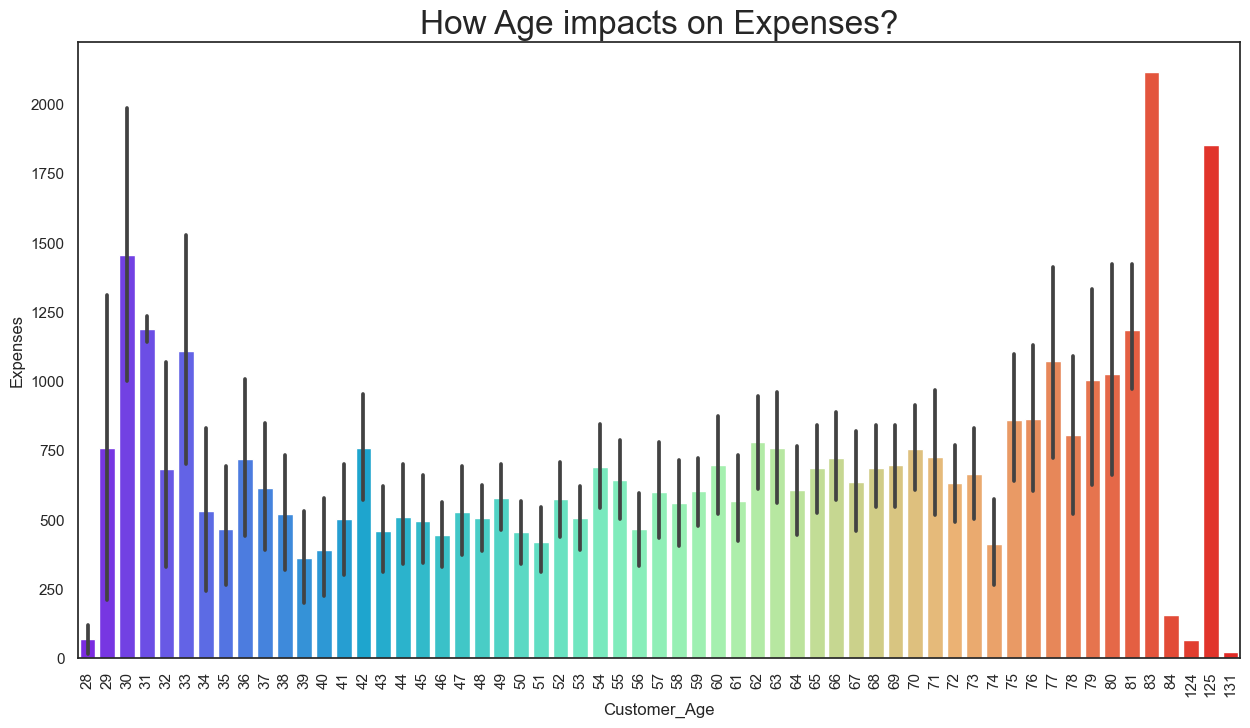

In [64]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=df,palette="rainbow")

plt.show()

People who are in middle age have less expenses than others

### Remove some outliers present in age and income

In [65]:
df.Income.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [66]:
df['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [67]:
df.shape

(2240, 9)

In [68]:
df = df[df['Customer_Age'] < 90]
df = df[df['Income'] < 300000]

In [69]:
df.shape

(2236, 9)

In [70]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


In [71]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [72]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

In [73]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,58138.0,0,1617,0,25,67,663
1,0,1,46344.0,2,27,0,6,70,113
2,0,0,71613.0,0,776,0,21,59,312
3,0,0,26646.0,1,53,0,8,40,139
4,0,0,58293.0,1,422,0,19,43,161


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']

df[col_scale] = scaler.fit_transform(df[col_scale])

In [75]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


### Finding the correlation:-

<Axes: >

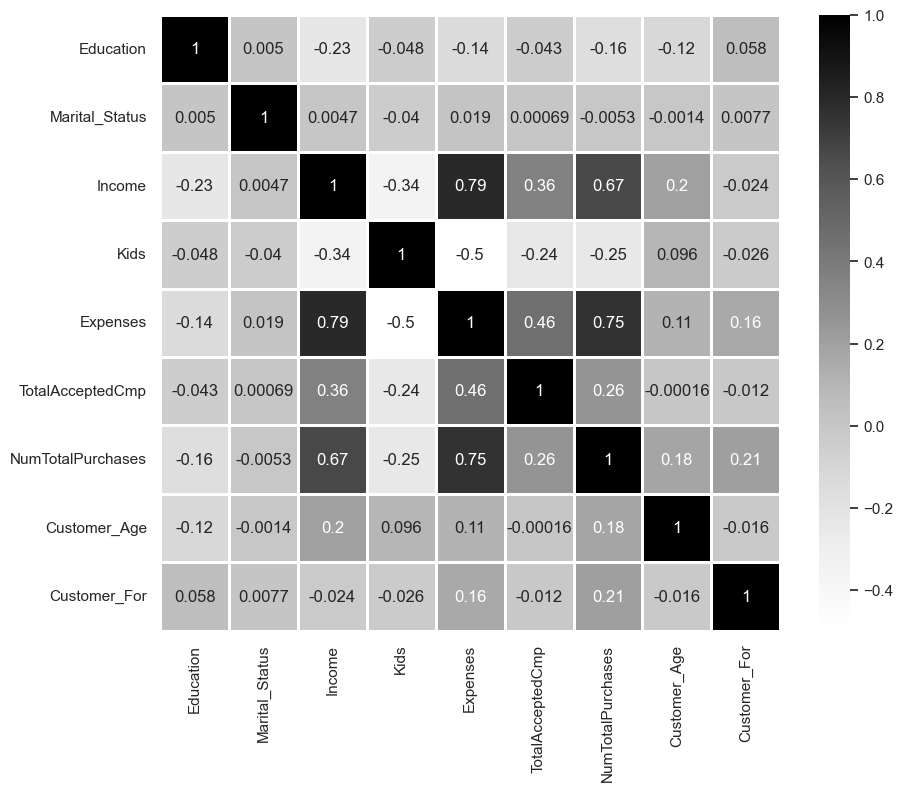

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Greys',linewidths=1)

Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

### Model building

### K Means

In [77]:
X_0 = df.copy()

In [78]:
from sklearn.cluster import KMeans

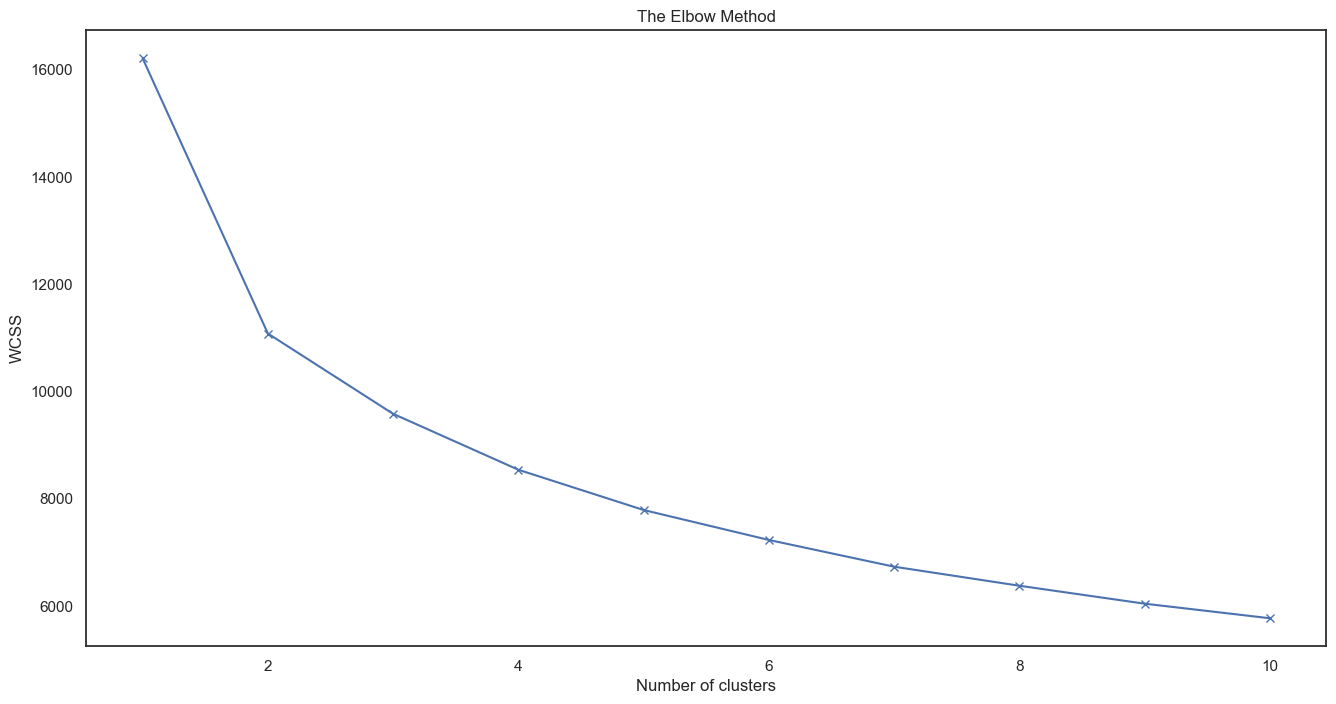

In [79]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can understand from the plot that cluster = 2 is the best... 

In [80]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)

In [81]:
# Appending those cluster value into main dataframe (without standard-scalar)

X_0['cluster_Kmeans'] = pred + 1

In [82]:
X_0.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,1
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,2
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,1
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,2
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,2


<Axes: xlabel='Expenses', ylabel='Income'>

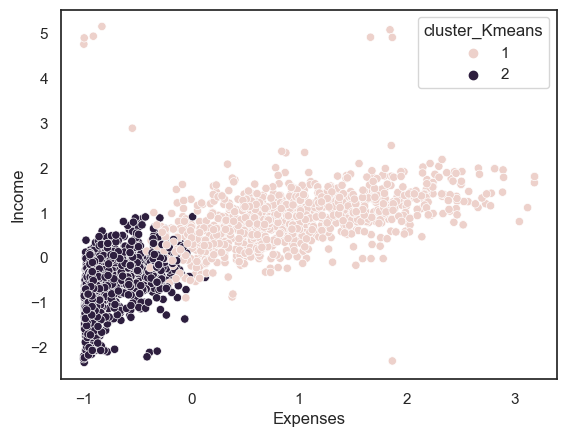

In [83]:
sns.scatterplot(x=X_0['Expenses'],y=X_0['Income'],hue=X_0['cluster_Kmeans'])

<Axes: xlabel='Kids', ylabel='Income'>

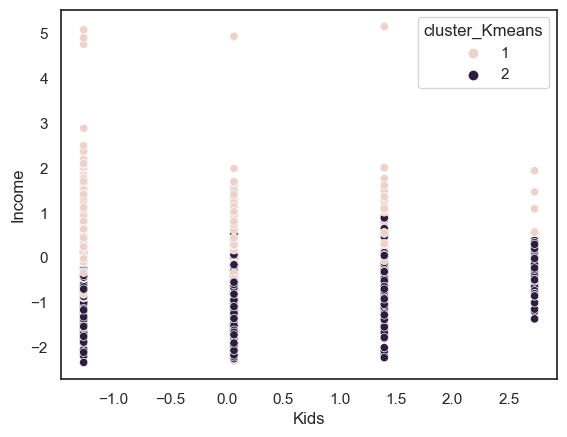

In [84]:
sns.scatterplot(x=X_0['Kids'], y=X_0['Income'],hue=X_0.cluster_Kmeans)

<Axes: xlabel='Marital_Status', ylabel='Income'>

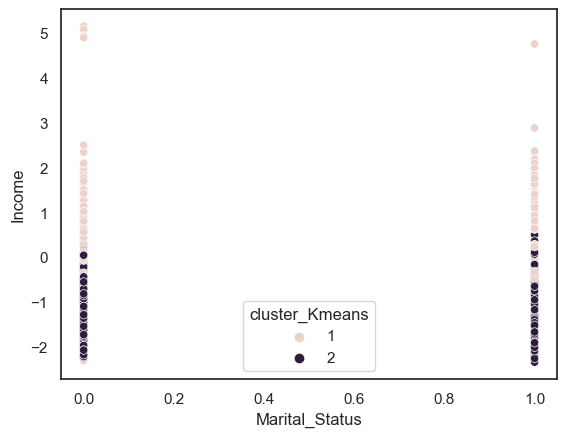

In [85]:
sns.scatterplot(x=X_0['Marital_Status'],y=X_0['Income'],hue=X_0.cluster_Kmeans)

<Axes: xlabel='Marital_Status', ylabel='Expenses'>

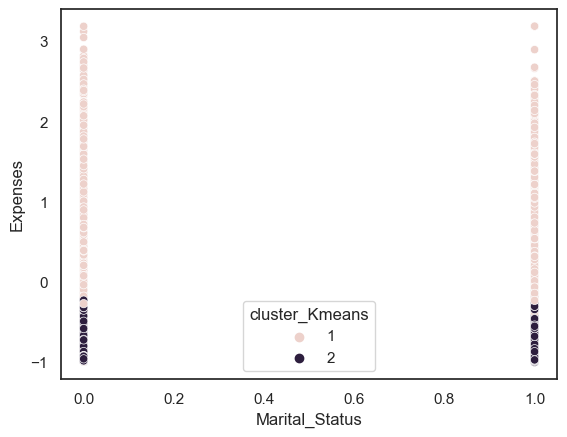

In [86]:
sns.scatterplot(x=X_0['Marital_Status'],y=X_0['Expenses'],hue=X_0.cluster_Kmeans)

<Axes: xlabel='Income', ylabel='Customer_Age'>

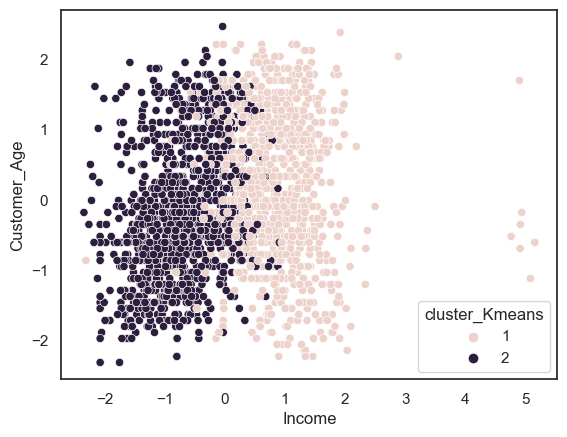

In [87]:
sns.scatterplot(x=X_0['Income'],y=X_0['Customer_Age'],hue=X_0.cluster_Kmeans)

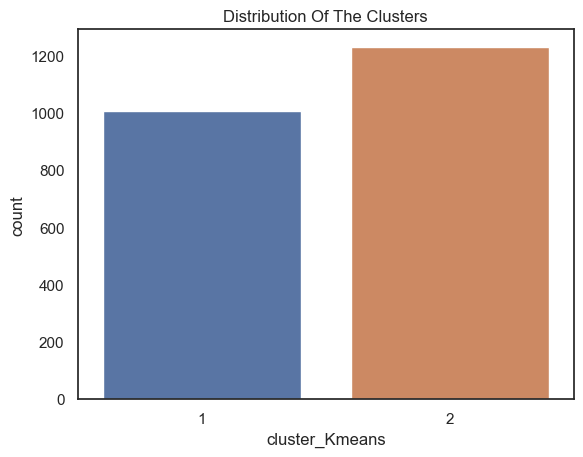

In [88]:
sns.countplot(x=X_0.cluster_Kmeans)
plt.title("Distribution Of The Clusters")
plt.show()

### Cluster 2:
People with less expenses

people who are married and parents of more than 3 kids

people which low income


-------------------------------------------------------------------------
-------------------------------------------------------------------------

### Cluster 1:
people with more expenses

people who are single or parents who have less than 3 kids

people with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group


So, the customers falling in cluster 1 likes to spend more...so the Firm's can target people falling in cluster 1 for the sale of their Products....

# Thanks you!!!!

In [89]:
import pickle
from sklearn.cluster import KMeans

# Assuming kmeans is your trained KMeans model
kmeans = KMeans(n_clusters=2)  # Example model initialization
# Train your KMeans model here...

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
